### Implementation of $\mathbb P_1$ FEM in 1D

We want to solve 
$$
   -u_{xx} = f(x) \quad\text{ on }\quad (0,1), \qquad u(0)=u(1)=0
$$
with $f=1$ in this simple example.

For a subdivision $\mathcal T_h=\{K_i\}_{i=1}^M$ of $\Omega=(0,1)$, define

$$
X_h^1 = \{v\in C^{0}[0,1]\;|\; v|_{K} \in \mathbb{P}_1 \ \forall K\in\mathcal T_h\}\qquad \text{and}\qquad V_h = \{v\in X_h^1: v(0)=0=v(1)\}.
$$

The Galerkin $\mathbb P_1$ FEM is then given by: 

$\qquad$Find $u_h\in V_h$ such that$\qquad a(u_h,v) := \int_0^1 u_h' v'\, dx = \int_0^1 fv\, dx := F(v) \qquad \forall v\in V_h.$

Using the hat-function basis, $X_h^1=\text{span}\{\phi_0,\dots,\phi_M\}$, $u_h(x)=\sum_{i=0}^M U_i \phi_i(x)$, and the FEM becomes a linear system:

$$A \vec U = \vec F$$

where
$$A_{ij}=a(\phi_j,\phi_i),\qquad \vec U = [U_0 , \dots, U_M],\qquad \vec F = [ F(\phi_0), \dots, F(\phi_M) ]$$

#### Implementation

Initialise python libraries, set plotting parameters

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
newparams = {'figure.figsize': (8.0, 4.0), 'axes.grid': True,
             'lines.markersize': 8, 'lines.linewidth': 2,
             'font.size': 14}
plt.rcParams.update(newparams)

Set ut the subdivision ('triangulation') of space: Choose nodes $x_i$ and elements $K_k=(x_{k-1},x_{k})$. 

In [2]:
Xk = np.array([0, 0.1, 0.3, 0.6, 0.8, 0.9, 0.95, 0.97, 1])  # Nodes, elements K(i) = (x(i-1), x(i))
Mi = len(Xk)                     # Number of nodes
T = np.ndarray.transpose(np.array([Xk[:-1],Xk[1:]])) # Set of elements/triangulation
H = Xk[1:]-Xk[:-1]               # Element sizes
Mk = Mi-1                        # Number of elements

In [3]:
print("\nNodes: ",Xk,"\n\nNumber of nodes: Mi = ", Mi)
print("\nCollection of elements ('triangulation'):\n\n T = \n\n",T,"\n\nNumber of elements: Mk = ", Mk,"\n\nElement sizes: H = ",H)


Nodes:  [0.   0.1  0.3  0.6  0.8  0.9  0.95 0.97 1.  ] 

Number of nodes: Mi =  9

Collection of elements ('triangulation'):

 T = 

 [[0.   0.1 ]
 [0.1  0.3 ]
 [0.3  0.6 ]
 [0.6  0.8 ]
 [0.8  0.9 ]
 [0.9  0.95]
 [0.95 0.97]
 [0.97 1.  ]] 

Number of elements: Mk =  8 

Element sizes: H =  [0.1  0.2  0.3  0.2  0.1  0.05 0.02 0.03]


Set up the elemental stiffness matrix and elemental load vector).

In [4]:
Ak = np.array([[1,-1],[-1,1]])
fk = np.array([1/2,1/2])   # f=1

Find the local to global mapping (here the elements are numbered from 0, and not from 1)

In [5]:
def loc2glob(k,alpha):
    return k+alpha          # Numbering k from 0

The assembly process:

In [6]:
A = np.zeros((Mi,Mi))
f = np.zeros((Mi))

for k in range(0,Mk):
    for alpha in range(2):
        i = loc2glob(k,alpha)
        for beta in range(2):
            j = loc2glob(k,beta)
            A[i,j] += Ak[alpha,beta]/H[k]
        f[i] += fk[alpha]*H[k]

Print the resulting matrix $A$ and vector $f$.

In [7]:
print("A=\n", np.around(A,decimals=1, out=None),"\n\n","f=", np.around(f,decimals=1, out=None))

A=
 [[ 10.  -10.    0.    0.    0.    0.    0.    0.    0. ]
 [-10.   15.   -5.    0.    0.    0.    0.    0.    0. ]
 [  0.   -5.    8.3  -3.3   0.    0.    0.    0.    0. ]
 [  0.    0.   -3.3   8.3  -5.    0.    0.    0.    0. ]
 [  0.    0.    0.   -5.   15.  -10.    0.    0.    0. ]
 [  0.    0.    0.    0.  -10.   30.  -20.    0.    0. ]
 [  0.    0.    0.    0.    0.  -20.   70.  -50.    0. ]
 [  0.    0.    0.    0.    0.    0.  -50.   83.3 -33.3]
 [  0.    0.    0.    0.    0.    0.    0.  -33.3  33.3]] 

 f= [0.  0.2 0.2 0.2 0.2 0.1 0.  0.  0. ]


Impose the boundary conditions by changing the first and the last equation. 

In [8]:
# Impose boundary condition
# Dirichlet boundary conditions
A[0,:] = 0;
A[0,0] = 1
f[0] = 0
A[-1,:] = 0
A[-1,-1] = 1
f[-1] = 0

And solve the corresponding linear system

In [9]:
U = np.linalg.solve(A,f)

Plot the solution. 

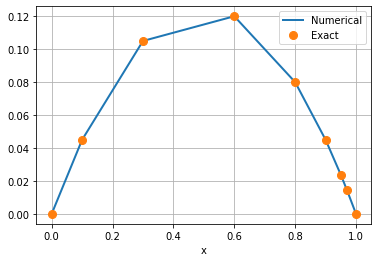

In [10]:
plt.plot(Xk,U,Xk,0.5*Xk*(1-Xk),'o')
plt.legend(['Numerical','Exact'])
plt.xlabel('x');